In [1]:
"""
Solve a linear system
=======================

Construct a 1000x1000 lil_matrix and add some values to it, convert it
to CSR format and solve A x = b for x:and solve a linear system with a
direct solver.
"""
import numpy as np
import scipy.sparse as sps
from matplotlib import pyplot as plt
from scipy.sparse.linalg.dsolve import linsolve

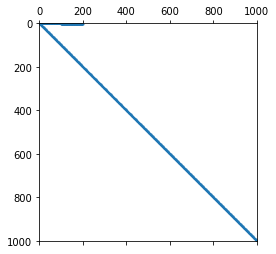

rezidual: 1.6074332261036576e-14


In [11]:

rand = np.random.rand

mtx = sps.lil_matrix((1000, 1000), dtype=np.float64)
mtx[0, :100] = rand(100)
mtx[1, 100:200] = mtx[0, :100]
mtx.setdiag(rand(1000))
plt.clf()
plt.spy(mtx, marker='.', markersize=2)
plt.show()

mtx = mtx.tocsr()
rhs = rand(1000)

x = linsolve.spsolve(mtx, rhs)

print('rezidual: %r' % np.linalg.norm(mtx * x - rhs))

In [12]:
import csv
import math
import random
import numpy as np
import pandas as pd

In [22]:
cols = ['sqft','Bedroom','Price']
df=pd.read_csv("D:\Work\HousePrices.csv",header = 0,names=cols)
df.head()

,sqft,Bedroom,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [23]:
df.describe()

,sqft,Bedroom,Price
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


Text(0.5, 1.0, 'Price vs Sqft')

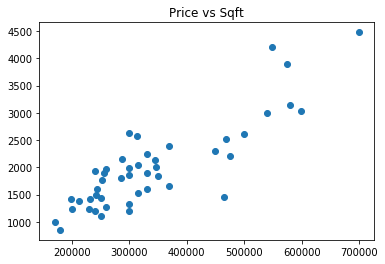

In [25]:
plt.scatter(df.Price,df.sqft)
plt.title("Price vs Sqft")

Text(0.5, 1.0, 'Price vs Bedroom')

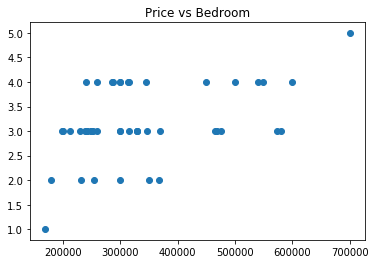

In [27]:
plt.scatter(df.Price,df.Bedroom)
plt.title("Price vs Bedroom")

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [33]:
from sklearn.model_selection import train_test_split
labels = df['Price']
train1 = df.drop(['Price'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train1,labels, train_size = 0.10,random_state = 2)

In [34]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg.score(x_test,y_test)

0.42271471178466447

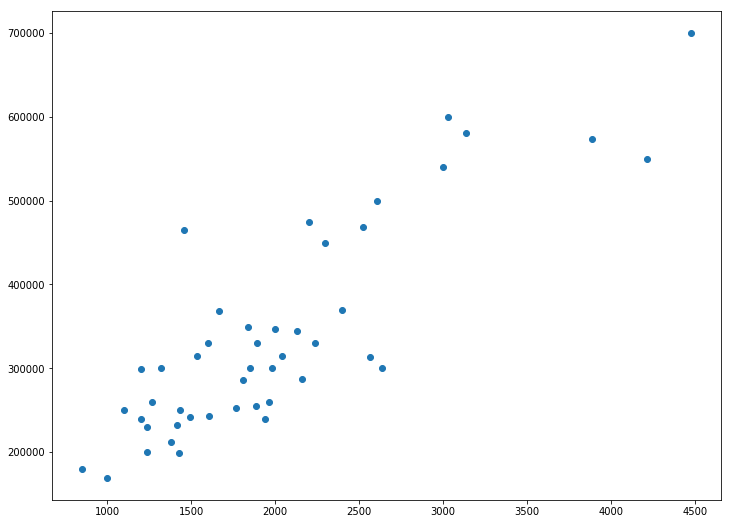

In [44]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
cols = ['sqft','Bedroom','Price']
df=pd.read_csv("D:\Work\HousePrices.csv",header = 0,names=cols)
X = df.iloc[:, 0]
Y = df.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [76]:
from sklearn.preprocessing import normalize
data = normalize(df, axis=0)

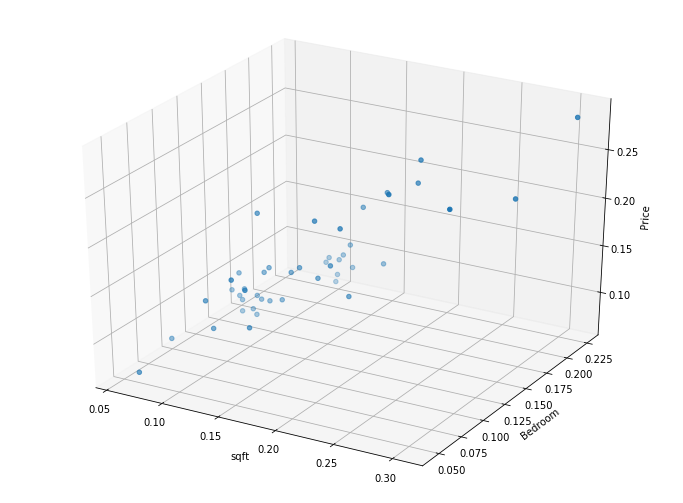

In [78]:
# Making the imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Input data

X = data[:, 0:2]
Y = data[:, 2:]
# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('sqft')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price')

plt.show()

In [93]:
learning_rate = 0.09
max_iteration = 500

In [94]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

In [98]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [102]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

In [278]:
tempX = h (theta, X)
tempX

array([[-0.14351393],
       [-0.14468428],
       [-0.14231307],
       [-0.14649373],
       [-0.14500884],
       [-0.14341738],
       [-0.14326084],
       [-0.14319208],
       [-0.14335886],
       [-0.14494301],
       [-0.14409911],
       [-0.14393818],
       [-0.14958764],
       [-0.14302823],
       [-0.14546967],
       [-0.14217262],
       [-0.14298142],
       [-0.14592172],
       [-0.14653908],
       [-0.14375824],
       [-0.14300358],
       [-0.14351978],
       [-0.1449752 ],
       [-0.14686407],
       [-0.14278246],
       [-0.14330619],
       [-0.14486862],
       [-0.1443917 ],
       [-0.145031  ],
       [-0.14293189],
       [-0.1407728 ],
       [-0.14508931],
       [-0.14576247],
       [-0.14475429],
       [-0.14327547],
       [-0.14298581],
       [-0.1452239 ],
       [-0.14827121],
       [-0.14526778],
       [-0.14267588],
       [-0.14444729],
       [-0.14586028],
       [-0.14292875],
       [-0.14148797],
       [-0.14481427],
       [-0

In [279]:
cost = loss(theta, X,y)
cost

0.039897385865242344

In [268]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [269]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [272]:
theta = gradient (theta, X, Y)
theta

array([[-0.13837818],
       [-0.02133855],
       [-0.02062364]])

In [105]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.009151235419918899
iteration :  100  loss :  0.0011878506884696394
iteration :  200  loss :  0.0011412944615944757
iteration :  300  loss :  0.0010974215243126106
iteration :  400  loss :  0.0010560757063829797


In [106]:
theta

array([[0.11659919],
       [0.11238185],
       [0.04693697]])

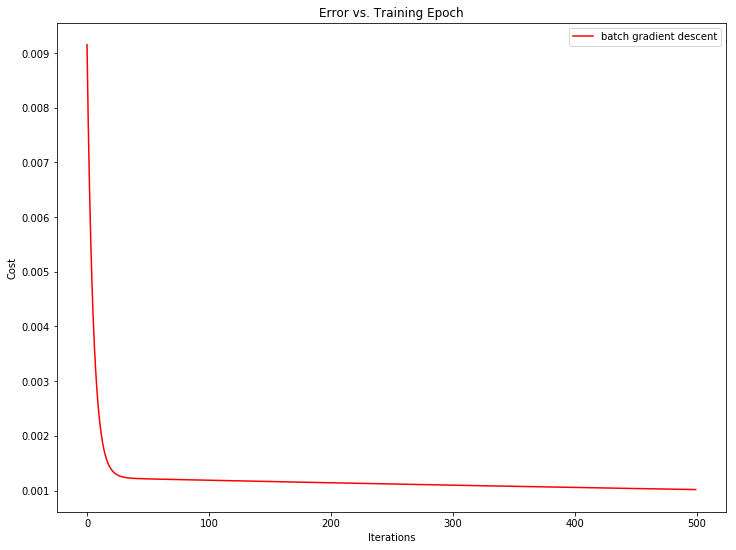

In [109]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
#ax.plot(np.arange(max_iteration), s_cost, 'b')  
#ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

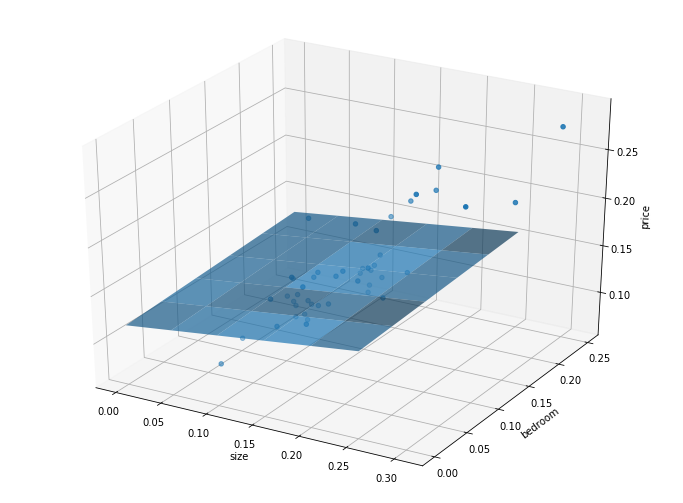

In [110]:
# Fixing random state for reproducibility
# np.random.seed(19680801)
#Visualizing the data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

In [255]:
from sklearn.model_selection import train_test_split
labels = df['Price']
train1 = df.drop(['Price'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train1,labels, train_size = 0.80,random_state = 2)

In [257]:
print(x_train.shape)
print(x_test.shape)

(36, 2)
(10, 2)


In [258]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

86711.799655457
[   145.19795501 -12481.58224184]


In [260]:
y_pred = regressor.predict(x_test)

In [280]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = np.array(y_pred)
df1= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head()

,Actual,Predicted
0,573900,614087.097916
1,699900,674500.330978
2,314000,409508.621197
3,199900,228731.725321
4,229900,229167.319187


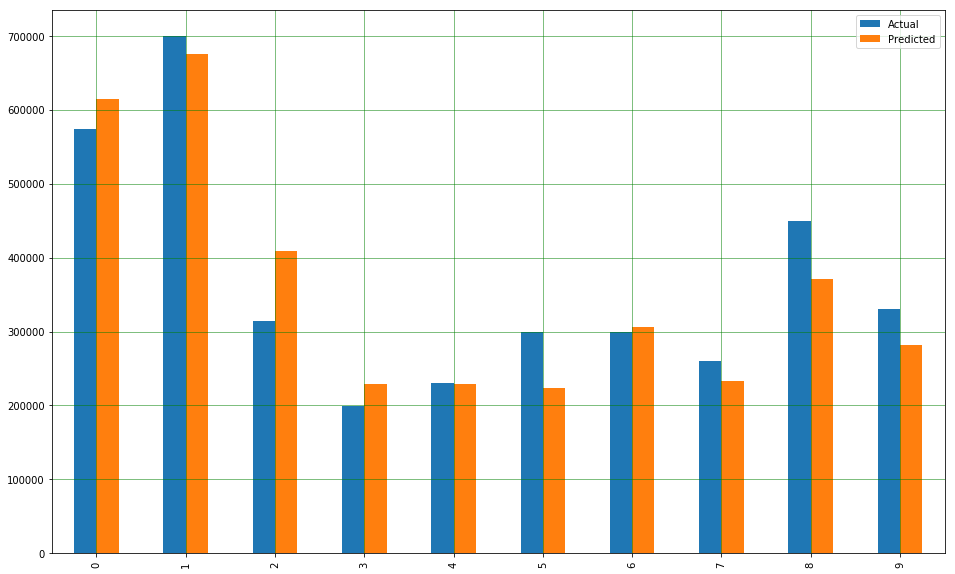

In [262]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [263]:
len(x_test) == len(y_test)

True

In [266]:
print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)

(10, 2)
(10,)
(10,)


ValueError: x and y must be the same size

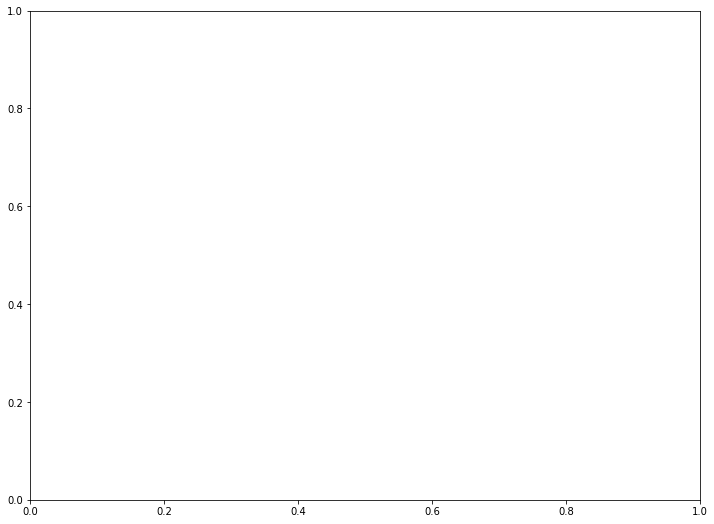

In [265]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()